In [42]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'


In [43]:
#https://github.com/thtrieu/darkflow/issues/256 ( using this issue  i got some idea like what is happening)

#https://github.com/thtrieu/darkflow/issues/560(using this i solve my problem like why i use checkpoint?)

# define the model options and run
#first run 
    #Export the model as a protobuff (.pb) file
    
    #flow --model cfg/yolo-1c.cfg --load bin/yolo.weights --savepb
    
    #In your python code load the .pb and the .meta files
    
    #from darkflow.net.build import TFNet
    #options = {"metaLoad": "built_graph/yolo-1c.meta", 
#              "pbLoad": "built_graph/yolo-1c.pb",
 #               "threshold": 0.1,
  #              "gpu": 1.0}
    #tfnet = TFNet(options)
##


options = {
    'metaLoad':"built_graph/yolo-1c.meta", 
    'pbLoad':"built_graph/yolo-1c.pb",
    'threshold': 0.15,
    'gpu': 1.0
}
tfnet = TFNet(options)


Loading from .pb and .meta
GPU mode with 1.0 usage


In [57]:
# read the color image and convert to RGB

img = cv2.imread('/home/ankit/Downloads/fidgetspinner.jpg',cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # for real world color
# use YOLO to predict the image

result = tfnet.return_predict(img)
result



[{'bottomright': {'x': 9, 'y': 9},
  'confidence': 0.49265152,
  'label': 'fidget_spinner',
  'topleft': {'x': 3, 'y': 1}},
 {'bottomright': {'x': 16, 'y': 17},
  'confidence': 0.4752751,
  'label': 'fidget_spinner',
  'topleft': {'x': 0, 'y': 0}},
 {'bottomright': {'x': 21, 'y': 10},
  'confidence': 0.5156631,
  'label': 'fidget_spinner',
  'topleft': {'x': 14, 'y': 1}},
 {'bottomright': {'x': 27, 'y': 17},
  'confidence': 0.4092161,
  'label': 'fidget_spinner',
  'topleft': {'x': 10, 'y': 0}},
 {'bottomright': {'x': 94, 'y': 54},
  'confidence': 0.55516064,
  'label': 'fidget_spinner',
  'topleft': {'x': 0, 'y': 0}},
 {'bottomright': {'x': 34, 'y': 10},
  'confidence': 0.56133366,
  'label': 'fidget_spinner',
  'topleft': {'x': 27, 'y': 0}},
 {'bottomright': {'x': 40, 'y': 17},
  'confidence': 0.42005682,
  'label': 'fidget_spinner',
  'topleft': {'x': 21, 'y': 0}},
 {'bottomright': {'x': 47, 'y': 10},
  'confidence': 0.56756276,
  'label': 'fidget_spinner',
  'topleft': {'x': 40, 'y

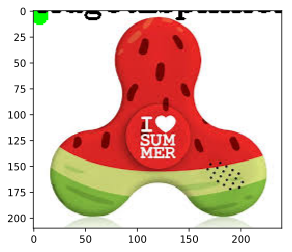

In [58]:
# pull out some info from the results

tl = (result[0]['topleft']['x'], result[0]['topleft']['y'])
br = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
label = result[0]['label']


# add the box and label and display it
img = cv2.rectangle(img, tl, br, (0, 255, 0), 7)
img = cv2.putText(img,label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,0),2)
plt.imshow(img)
plt.show()